# COP528 Applied Machine Learning Coursework 

In this coursework you will apply what you have learnt in this module to solve real-world problems, both with classical machine learning and popular deep learning methods. The coursework has two tasks, the first task is about designing a pipeline to use ML methods to solve a predefined task (60%), and the second task is about using a Convolutional Neural Network (CNN) for image analysis (40%).

## Task 2: Deep Learning for image classification (40%)

You will be provided with an image dataset, where each image contains meaningful objects, e.g., parachute, oilbox and truck etc. You could either use an existing CNN network architecture or design your own CNN network for classifying test images into the predefined classes. 

### Loading data

In [130]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [131]:
# adapted from [https://www.tensorflow.org/tutorials/images/transfer_learning]

# how many images per batch 
BATCH_SIZE = 32
# how many pixels
SIZE = 200
IMG_SIZE = (SIZE, SIZE)

# load training set, shuffle and set image and batch size
train_dataset = image_dataset_from_directory("C:/Users/arl3n/Documents/ActualLocalLoughborough/7COP528/CW/datasets/imageset/imageset/train",
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)
# load validation set, shuffle and set image and batch size
validation_dataset = image_dataset_from_directory("C:/Users/arl3n/Documents/ActualLocalLoughborough/7COP528/CW/datasets/imageset/imageset/val",
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

Found 9469 files belonging to 10 classes.
Found 3925 files belonging to 10 classes.


In [132]:
# get class names
class_names_train = train_dataset.class_names
class_names_val = validation_dataset.class_names

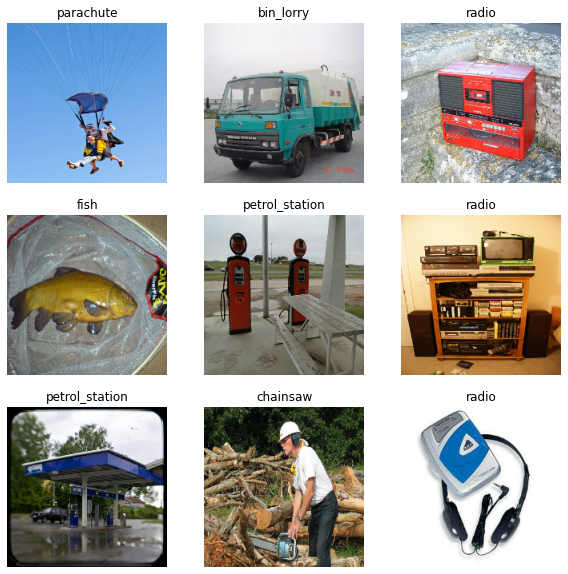

In [133]:
#copied from [https://www.tensorflow.org/tutorials/images/transfer_learning]

# plot the first 9 images from the training set and display the class name below each image.
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names_train[labels[i]])
    plt.axis("off")

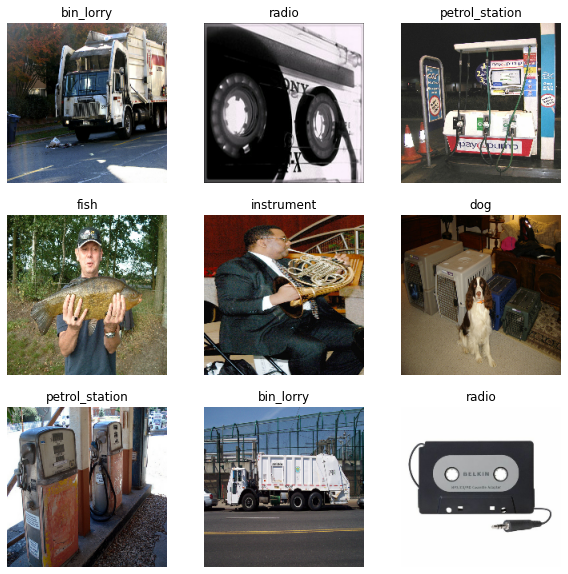

In [134]:
# adappted from [https://www.tensorflow.org/tutorials/images/transfer_learning]

# plot the first 9 images from the training set and display the class name below each image.
plt.figure(figsize=(10, 10))
for images, labels in validation_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names_val[labels[i]])
    plt.axis("off")

### Define the convolutional base

In [135]:
# # adapted from [https://www.tensorflow.org/tutorials/images/cnn]

# declare model
model = models.Sequential()
# add convolutional layern with 6 filters and 3x3 kernel
model.add(layers.Conv2D(6, (3, 3), activation='relu', input_shape=(SIZE, SIZE, 3)))
# add max pooling layer
model.add(layers.MaxPooling2D((2, 2)))
# add convolutional layern with 64 filters and 3x3 kerne
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# add max pooling layer
model.add(layers.MaxPooling2D((2, 2)))
# add convolutional layern with 64 filters and 3x3 kernel
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [136]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_71 (Conv2D)           (None, 198, 198, 6)       168       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 99, 99, 6)         0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 97, 97, 64)        3520      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 46, 46, 64)        36928     
Total params: 40,616
Trainable params: 40,616
Non-trainable params: 0
_________________________________________________________________


### Add Dense layers 

In [137]:
# copied from [https://www.tensorflow.org/tutorials/images/cnn]

# add flatteining function
model.add(layers.Flatten())
# add fully connected layer with 64 nodes
model.add(layers.Dense(64, activation='relu'))
# add fully connected layer with 64 nodes
model.add(layers.Dense(10))

In [138]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_71 (Conv2D)           (None, 198, 198, 6)       168       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 99, 99, 6)         0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 97, 97, 64)        3520      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
flatten_22 (Flatten)         (None, 135424)            0         
_________________________________________________________________
dense_63 (Dense)             (None, 64)              

### Compile and train the model

In [139]:
# adapted from [https://www.tensorflow.org/tutorials/images/cnn]

# compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# save/show model fitting process
history = model.fit(train_dataset, 
                    epochs=10, 
                    validation_data=validation_dataset)

Epoch 1/10
296/296 [==============================] - 102s 342ms/step - loss: 22.5157 - accuracy: 0.1369 - val_loss: 2.2931 - val_accuracy: 0.1200
Epoch 2/10
296/296 [==============================] - 101s 340ms/step - loss: 2.1753 - accuracy: 0.2157 - val_loss: 2.3343 - val_accuracy: 0.1261
Epoch 3/10
296/296 [==============================] - 101s 342ms/step - loss: 1.8955 - accuracy: 0.3397 - val_loss: 2.7101 - val_accuracy: 0.1526
Epoch 4/10
296/296 [==============================] - 101s 342ms/step - loss: 1.6960 - accuracy: 0.4165 - val_loss: 3.2408 - val_accuracy: 0.1462
Epoch 5/10
296/296 [==============================] - 101s 340ms/step - loss: 1.4786 - accuracy: 0.5031 - val_loss: 3.8263 - val_accuracy: 0.1643
Epoch 6/10
296/296 [==============================] - 100s 336ms/step - loss: 1.3306 - accuracy: 0.5620 - val_loss: 3.9512 - val_accuracy: 0.1651
Epoch 7/10
296/296 [==============================] - 101s 340ms/step - loss: 1.2380 - accuracy: 0.5989 - val_loss: 4.3687 

### Evaluate the model

123/123 - 9s - loss: 7.8802 - accuracy: 0.1918


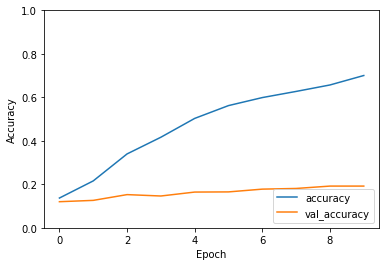

In [140]:
# adapted from [https://www.tensorflow.org/tutorials/images/cnn]

# plot validation and training accuracy against epoch
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# get test loss and test accuracy
test_loss, test_acc = model.evaluate(validation_dataset, verbose=2)

In [141]:
# accuracy of model on validation set
print(test_acc)

0.19184713065624237


So, this frist model built had a pretty low accuraccy on the validation set, but high on the training set, suggesting overfitting. Next, we will try some more models.

### Try a LeNet model

In [77]:
# adapted from [https://www.tensorflow.org/tutorials/images/transfer_learning]

BATCH_SIZE = 32
# make size 32, for lenet model
SIZE = 32
IMG_SIZE = (SIZE, SIZE)

train_dataset2 = image_dataset_from_directory("C:/Users/arl3n/Documents/ActualLocalLoughborough/7COP528/CW/datasets/imageset/imageset/train",
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

validation_dataset2 = image_dataset_from_directory("C:/Users/arl3n/Documents/ActualLocalLoughborough/7COP528/CW/datasets/imageset/imageset/val",
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

Found 9469 files belonging to 10 classes.
Found 3925 files belonging to 10 classes.


In [78]:
# get class names
class_names_train2 = train_dataset2.class_names
class_names_val2 = validation_dataset2.class_names

print(class_names_train2)
print(class_names_val2)

['bin_lorry', 'chainsaw', 'church', 'dog', 'fish', 'golf', 'instrument', 'parachute', 'petrol_station', 'radio']
['bin_lorry', 'chainsaw', 'church', 'dog', 'fish', 'golf', 'instrument', 'parachute', 'petrol_station', 'radio']


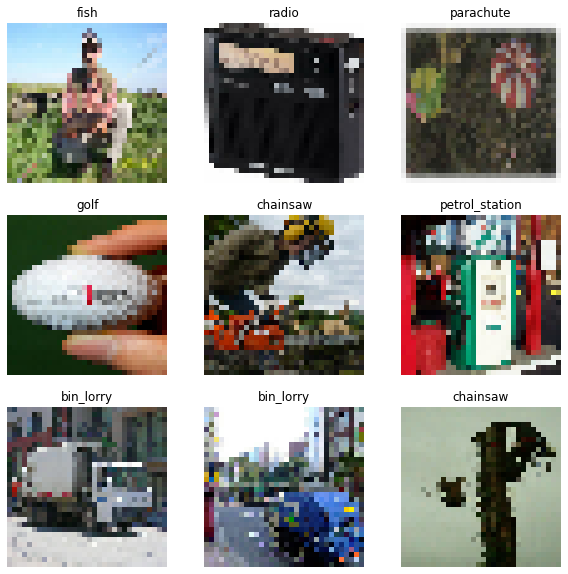

In [79]:
#copied from [https://www.tensorflow.org/tutorials/images/transfer_learning]

# plot the first 9 images from the training set and display the class name below each image.
plt.figure(figsize=(10, 10))
for images, labels in train_dataset2.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names_train2[labels[i]])
    plt.axis("off")

In [80]:
# # adapted from [https://medium.com/@mgazar/lenet-5-in-9-lines-of-code-using-keras-ac99294c8086]

# declare model
model2 = models.Sequential()
# add convolutional layern with 6 filters and 3x3 kernel
model2.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(SIZE,SIZE,3)))
# add avg pooling layer
model2.add(layers.AveragePooling2D())
# add convolutional layern with 16 filters and 3x3 kernel
model2.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
# add avg pooling layer
model2.add(layers.AveragePooling2D())
# add flatteining function
model2.add(layers.Flatten())
# add fully connected layer with 120 nodes
model2.add(layers.Dense(units=120, activation='relu'))
# add fully connected layer with 84 nodes
model2.add(layers.Dense(units=84, activation='relu'))
# add fully connected layer with 10 nodes
model2.add(layers.Dense(units=10, activation = 'softmax'))

In [116]:
model2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 30, 30, 6)         168       
_________________________________________________________________
average_pooling2d_8 (Average (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 13, 13, 16)        880       
_________________________________________________________________
average_pooling2d_9 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 120)               69240     
_________________________________________________________________
dense_23 (Dense)             (None, 84)              

In [82]:
# adapted from [https://www.tensorflow.org/tutorials/images/cnn]

# compile model
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# save/show model fitting process
history2 = model2.fit(train_dataset2, 
                    epochs=10, 
                    validation_data=validation_dataset2)

Epoch 1/10
296/296 [==============================] - 7s 21ms/step - loss: 2.1367 - accuracy: 0.3005 - val_loss: 1.7953 - val_accuracy: 0.3827
Epoch 2/10
296/296 [==============================] - 6s 21ms/step - loss: 1.6127 - accuracy: 0.4530 - val_loss: 1.6621 - val_accuracy: 0.4329
Epoch 3/10
296/296 [==============================] - 6s 21ms/step - loss: 1.4307 - accuracy: 0.5183 - val_loss: 1.6509 - val_accuracy: 0.4550
Epoch 4/10
296/296 [==============================] - 6s 21ms/step - loss: 1.2714 - accuracy: 0.5699 - val_loss: 1.7078 - val_accuracy: 0.4522
Epoch 5/10
296/296 [==============================] - 6s 21ms/step - loss: 1.1227 - accuracy: 0.6278 - val_loss: 1.6759 - val_accuracy: 0.4820
Epoch 6/10
296/296 [==============================] - 6s 21ms/step - loss: 0.9908 - accuracy: 0.6672 - val_loss: 1.7264 - val_accuracy: 0.4713
Epoch 7/10
296/296 [==============================] - 6s 21ms/step - loss: 0.8622 - accuracy: 0.7120 - val_loss: 1.8671 - val_accuracy: 0.4869

123/123 - 2s - loss: 2.4284 - accuracy: 0.4573


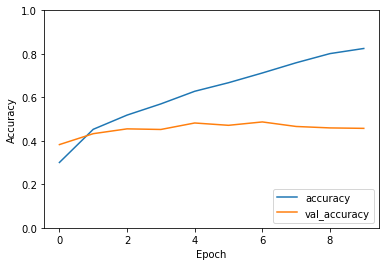

In [83]:
# adapted from [https://www.tensorflow.org/tutorials/images/cnn]

# plot validation and training accuracy against epoch
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# get test loss and test accuracy
test_loss2, test_acc2 = model2.evaluate(validation_dataset2, verbose=2)

In [84]:
# accuracy of model on validation set
print(test_acc2)

0.4573248326778412


This was a lot more accurate than the first model, but still shows signs of overfitting

Lets also try the LeNet model with more epochs

In [85]:
# do lenet model with 50 epochs, to see if accuracy inccreases
history2a = model2.fit(train_dataset2, 
                    epochs=50, 
                    validation_data=validation_dataset2)

Epoch 1/50
296/296 [==============================] - 6s 21ms/step - loss: 0.4097 - accuracy: 0.8621 - val_loss: 2.7887 - val_accuracy: 0.4423
Epoch 2/50
296/296 [==============================] - 6s 21ms/step - loss: 0.3489 - accuracy: 0.8869 - val_loss: 2.8998 - val_accuracy: 0.4489
Epoch 3/50
296/296 [==============================] - 6s 21ms/step - loss: 0.2930 - accuracy: 0.9025 - val_loss: 3.1019 - val_accuracy: 0.4504
Epoch 4/50
296/296 [==============================] - 6s 21ms/step - loss: 0.2630 - accuracy: 0.9126 - val_loss: 3.2269 - val_accuracy: 0.4474
Epoch 5/50
296/296 [==============================] - 6s 21ms/step - loss: 0.2224 - accuracy: 0.9265 - val_loss: 3.5910 - val_accuracy: 0.4532
Epoch 6/50
296/296 [==============================] - 6s 21ms/step - loss: 0.2168 - accuracy: 0.9272 - val_loss: 3.6223 - val_accuracy: 0.4387
Epoch 7/50
296/296 [==============================] - 6s 21ms/step - loss: 0.1984 - accuracy: 0.9377 - val_loss: 3.9844 - val_accuracy: 0.4211

123/123 - 2s - loss: 7.1365 - accuracy: 0.4382


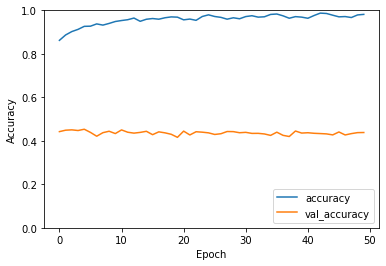

In [87]:
# adapted from [https://www.tensorflow.org/tutorials/images/cnn]

# plot validation and training accuracy against epoch
plt.plot(history2a.history['accuracy'], label='accuracy')
plt.plot(history2a.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# get test loss and test accuracy
test_loss2a, test_acc2a = model2.evaluate(validation_dataset2, verbose=2)

In [88]:
# accuracy of model on validation set
print(test_acc2a)

0.43821656703948975


A larger number of epochs did not impoove the model

### Try an Alexnet model

In [111]:
# adapted from [https://www.tensorflow.org/tutorials/images/transfer_learning]

# how many images per batch 
BATCH_SIZE = 32
# how many pixels
SIZE = 227
IMG_SIZE = (SIZE, SIZE)

# load training set, shuffle and set image and batch size
train_dataset3 = image_dataset_from_directory("C:/Users/arl3n/Documents/ActualLocalLoughborough/7COP528/CW/datasets/imageset/imageset/train",
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

# load validation set, shuffle and set image and batch size
validation_dataset3 = image_dataset_from_directory("C:/Users/arl3n/Documents/ActualLocalLoughborough/7COP528/CW/datasets/imageset/imageset/val",
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

Found 9469 files belonging to 10 classes.
Found 3925 files belonging to 10 classes.


In [112]:
# get class names
class_names_train3 = train_dataset3.class_names
class_names_val3 = validation_dataset3.class_names

print(class_names_train3)
print(class_names_val3)

['bin_lorry', 'chainsaw', 'church', 'dog', 'fish', 'golf', 'instrument', 'parachute', 'petrol_station', 'radio']
['bin_lorry', 'chainsaw', 'church', 'dog', 'fish', 'golf', 'instrument', 'parachute', 'petrol_station', 'radio']


In [113]:
# # copied from [https://towardsdatascience.com/implementing-alexnet-cnn-architecture-using-tensorflow-2-0-and-keras-2113e090ad98]

# declare model
model3 = models.Sequential([
    # add convolutional layern with 96 filters and 11x11 kernel, and convolution strides 4,4
    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    # normalise inputs
    layers.BatchNormalization(),
    # add max pooling layer
    layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    # add convolutional layern with 256 filters and 5x5 kernel, and convolution strides 1,1
    layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    # normalise inputs
    layers.BatchNormalization(),
    # add max pooling layer
    layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    # add convolutional layern with 384 filters and 3x3 kernel, and convolution strides 1,1
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    # normalise inputs
    layers.BatchNormalization(),
    # add convolutional layern with 384 filters and 3x3 kernel, and convolution strides 1,1
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    # normalise inputs
    layers.BatchNormalization(),
    # add convolutional layern with 256 filters and 3x3 kernel, and convolution strides 1,1
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    # normalise inputs
    layers.BatchNormalization(),
    # add max pooling layer
    layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    # flatten input
    layers.Flatten(),
    # add fully connected layer with 4096 nodes
    layers.Dense(4096, activation='relu'),
    # add dropout layer to avoid overfitting
    layers.Dropout(0.5),
    # add fully connected layer with 4096 nodes
    layers.Dense(4096, activation='relu'),
    # add dropout layer to avoid overfitting
    layers.Dropout(0.5),
    # add fully connected layer with 10 nodes
    layers.Dense(10, activation='softmax')
])


In [115]:
model3.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization_25 (Batc (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_26 (Batc (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 13, 13, 384)     

In [72]:
# adapted from [https://www.tensorflow.org/tutorials/images/cnn]
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history3 = model3.fit(train_dataset3, 
                    epochs=10, 
                    validation_data=validation_dataset3)

Epoch 1/10
296/296 [==============================] - 267s 901ms/step - loss: 6.1472 - accuracy: 0.2179 - val_loss: 2.6231 - val_accuracy: 0.1768
Epoch 2/10
296/296 [==============================] - 264s 893ms/step - loss: 2.0687 - accuracy: 0.3190 - val_loss: 1.8272 - val_accuracy: 0.3804
Epoch 3/10
296/296 [==============================] - 266s 899ms/step - loss: 1.9086 - accuracy: 0.3855 - val_loss: 2.1226 - val_accuracy: 0.3060
Epoch 4/10
296/296 [==============================] - 269s 910ms/step - loss: 1.8397 - accuracy: 0.4123 - val_loss: 1.6607 - val_accuracy: 0.4479
Epoch 5/10
296/296 [==============================] - 266s 898ms/step - loss: 1.7300 - accuracy: 0.4439 - val_loss: 1.7991 - val_accuracy: 0.4031
Epoch 6/10
296/296 [==============================] - 265s 897ms/step - loss: 1.6697 - accuracy: 0.4728 - val_loss: 1.7495 - val_accuracy: 0.4278
Epoch 7/10
296/296 [==============================] - 265s 895ms/step - loss: 1.5482 - accuracy: 0.5209 - val_loss: 1.5185 -

123/123 - 21s - loss: 1.6114 - accuracy: 0.4945


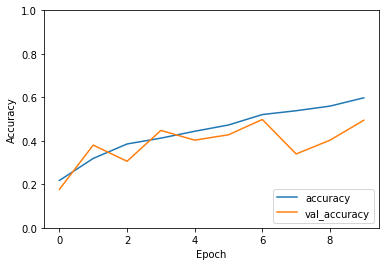

In [76]:
# adapted from [https://www.tensorflow.org/tutorials/images/cnn]

# plot validation and training accuracy against epoch
plt.plot(history3.history['accuracy'], label='accuracy')
plt.plot(history3.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0., 1])
plt.legend(loc='lower right')

# get test loss and test accuracy
test_loss3, test_acc3 = model3.evaluate(validation_dataset3, verbose=2)

In [74]:
# accuracy of model on validation set
print(test_acc3)

0.4945223033428192


So the Alexnet model is looking pretty good- it's the first model where validation accuracy seems to be roughly similar to training accuracy, which means it's not got such an overfitting problem. This is possibly due to the dropout layers. The model was alos still getting more accurate at the 10th epoch, but due to computation times we can't really see what happens after more epochs.

### Optimizing models

At this stage, we will try and tweak the lenet model, as it achieved similar accuracy as the Alexnet model, but with much quicker training times.

In [ ]:
# batch size
#image size
# dropout layers

First, let's try changing batch size

Found 9469 files belonging to 10 classes.
Found 3925 files belonging to 10 classes.
Epoch 1/10
74/74 [==============================] - 6s 79ms/step - loss: 6.2883 - accuracy: 0.1709 - val_loss: 2.2510 - val_accuracy: 0.2214
Epoch 2/10
74/74 [==============================] - 6s 78ms/step - loss: 2.0624 - accuracy: 0.2726 - val_loss: 2.0459 - val_accuracy: 0.3029
Epoch 3/10
74/74 [==============================] - 6s 78ms/step - loss: 1.8195 - accuracy: 0.3748 - val_loss: 1.9291 - val_accuracy: 0.3508
Epoch 4/10
74/74 [==============================] - 6s 78ms/step - loss: 1.6175 - accuracy: 0.4552 - val_loss: 1.8547 - val_accuracy: 0.3819
Epoch 5/10
74/74 [==============================] - 6s 78ms/step - loss: 1.4422 - accuracy: 0.5211 - val_loss: 1.8297 - val_accuracy: 0.4010
Epoch 6/10
74/74 [==============================] - 6s 78ms/step - loss: 1.2976 - accuracy: 0.5703 - val_loss: 1.8293 - val_accuracy: 0.4127
Epoch 7/10
74/74 [==============================] - 6s 78ms/step - los

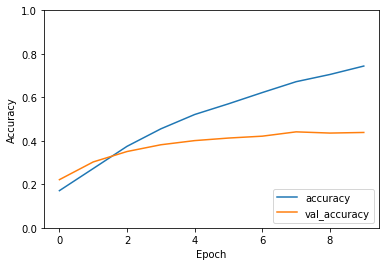

In [143]:
# change batch size to 128

BATCH_SIZE = 128
# make size 32, for lenet model
SIZE = 32
IMG_SIZE = (SIZE, SIZE)

train_dataset2b = image_dataset_from_directory("C:/Users/arl3n/Documents/ActualLocalLoughborough/7COP528/CW/datasets/imageset/imageset/train",
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

validation_dataset2b = image_dataset_from_directory("C:/Users/arl3n/Documents/ActualLocalLoughborough/7COP528/CW/datasets/imageset/imageset/val",
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

# get class names
class_names_train2b = train_dataset2b.class_names
class_names_val2b = validation_dataset2b.class_names

# declare model
model2b = models.Sequential()
# add convolutional layern with 6 filters and 3x3 kernel
model2b.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(SIZE,SIZE,3)))
# add avg pooling layer
model2b.add(layers.AveragePooling2D())
# add convolutional layern with 16 filters and 3x3 kernel
model2b.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
# add avg pooling layer
model2b.add(layers.AveragePooling2D())
# add flatteining function
model2b.add(layers.Flatten())
# add fully connected layer with 120 nodes
model2b.add(layers.Dense(units=120, activation='relu'))
# add fully connected layer with 84 nodes
model2b.add(layers.Dense(units=84, activation='relu'))
# add fully connected layer with 10 nodes
model2b.add(layers.Dense(units=10, activation = 'softmax'))

# compile model
model2b.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# save/show model fitting process
history2b = model2b.fit(train_dataset2b, 
                    epochs=10, 
                    validation_data=validation_dataset2b)

# plot validation and training accuracy against epoch
plt.plot(history2b.history['accuracy'], label='accuracy')
plt.plot(history2b.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# get test loss and test accuracy
test_loss2b, test_acc2b = model2b.evaluate(validation_dataset2b, verbose=2)

After 10 epochs, training accuracy was similar but validation accuracy was similar

Found 9469 files belonging to 10 classes.
Found 3925 files belonging to 10 classes.
Epoch 1/10
1184/1184 [==============================] - 7s 5ms/step - loss: 2.0311 - accuracy: 0.3163 - val_loss: 1.7633 - val_accuracy: 0.3888
Epoch 2/10
1184/1184 [==============================] - 6s 5ms/step - loss: 1.5951 - accuracy: 0.4664 - val_loss: 1.6597 - val_accuracy: 0.4492
Epoch 3/10
1184/1184 [==============================] - 6s 5ms/step - loss: 1.3806 - accuracy: 0.5393 - val_loss: 1.7134 - val_accuracy: 0.4550
Epoch 4/10
1184/1184 [==============================] - 6s 5ms/step - loss: 1.1844 - accuracy: 0.6072 - val_loss: 1.7488 - val_accuracy: 0.4708
Epoch 5/10
1184/1184 [==============================] - 6s 5ms/step - loss: 0.9824 - accuracy: 0.6730 - val_loss: 1.9959 - val_accuracy: 0.4527
Epoch 6/10
1184/1184 [==============================] - 6s 5ms/step - loss: 0.8202 - accuracy: 0.7243 - val_loss: 2.1699 - val_accuracy: 0.4573
Epoch 7/10
1184/1184 [==============================

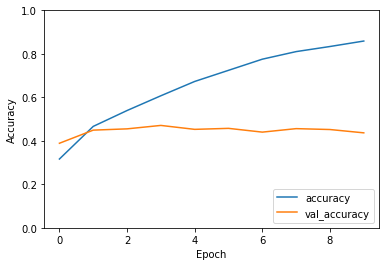

In [97]:
# change batch size to 8

BATCH_SIZE = 8
# make size 32, for lenet model
SIZE = 32
IMG_SIZE = (SIZE, SIZE)

train_dataset2b = image_dataset_from_directory("C:/Users/arl3n/Documents/ActualLocalLoughborough/7COP528/CW/datasets/imageset/imageset/train",
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

validation_dataset2b = image_dataset_from_directory("C:/Users/arl3n/Documents/ActualLocalLoughborough/7COP528/CW/datasets/imageset/imageset/val",
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

# get class names
class_names_train2b = train_dataset2b.class_names
class_names_val2b = validation_dataset2b.class_names

# declare model
model2b = models.Sequential()
# add convolutional layern with 6 filters and 3x3 kernel
model2b.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(SIZE,SIZE,3)))
# add avg pooling layer
model2b.add(layers.AveragePooling2D())
# add convolutional layern with 16 filters and 3x3 kernel
model2b.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
# add avg pooling layer
model2b.add(layers.AveragePooling2D())
# add flatteining function
model2b.add(layers.Flatten())
# add fully connected layer with 120 nodes
model2b.add(layers.Dense(units=120, activation='relu'))
# add fully connected layer with 84 nodes
model2b.add(layers.Dense(units=84, activation='relu'))
# add fully connected layer with 10 nodes
model2b.add(layers.Dense(units=10, activation = 'softmax'))

# compile model
model2b.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# save/show model fitting process
history2b = model2b.fit(train_dataset2b, 
                    epochs=10, 
                    validation_data=validation_dataset2b)

# plot validation and training accuracy against epoch
plt.plot(history2b.history['accuracy'], label='accuracy')
plt.plot(history2b.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# get test loss and test accuracy
test_loss2b, test_acc2b = model2b.evaluate(validation_dataset2b, verbose=2)

this model convereged a lot faster, but was then overfitted to the training data

Let's try increasing the size of the images

Found 9469 files belonging to 10 classes.
Found 3925 files belonging to 10 classes.
Epoch 1/10
296/296 [==============================] - 23s 77ms/step - loss: 2.1066 - accuracy: 0.2937 - val_loss: 1.7764 - val_accuracy: 0.3906
Epoch 2/10
296/296 [==============================] - 23s 78ms/step - loss: 1.3873 - accuracy: 0.5321 - val_loss: 1.7135 - val_accuracy: 0.4420
Epoch 3/10
296/296 [==============================] - 23s 78ms/step - loss: 0.7673 - accuracy: 0.7477 - val_loss: 1.9530 - val_accuracy: 0.4629
Epoch 4/10
296/296 [==============================] - 23s 79ms/step - loss: 0.3442 - accuracy: 0.8921 - val_loss: 2.5707 - val_accuracy: 0.4438
Epoch 5/10
296/296 [==============================] - 23s 79ms/step - loss: 0.1931 - accuracy: 0.9387 - val_loss: 2.7508 - val_accuracy: 0.4522
Epoch 6/10
296/296 [==============================] - 23s 78ms/step - loss: 0.1454 - accuracy: 0.9563 - val_loss: 3.1559 - val_accuracy: 0.4474
Epoch 7/10
296/296 [==============================] 

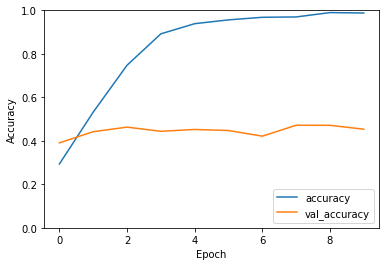

In [98]:
# change image size to 128x128

BATCH_SIZE = 32
SIZE = 128
IMG_SIZE = (SIZE, SIZE)

train_dataset2b = image_dataset_from_directory("C:/Users/arl3n/Documents/ActualLocalLoughborough/7COP528/CW/datasets/imageset/imageset/train",
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

validation_dataset2b = image_dataset_from_directory("C:/Users/arl3n/Documents/ActualLocalLoughborough/7COP528/CW/datasets/imageset/imageset/val",
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

# get class names
class_names_train2b = train_dataset2b.class_names
class_names_val2b = validation_dataset2b.class_names

# declare model
model2b = models.Sequential()
# add convolutional layern with 6 filters and 3x3 kernel
model2b.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(SIZE,SIZE,3)))
# add avg pooling layer
model2b.add(layers.AveragePooling2D())
# add convolutional layern with 16 filters and 3x3 kernel
model2b.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
# add avg pooling layer
model2b.add(layers.AveragePooling2D())
# add flatteining function
model2b.add(layers.Flatten())
# add fully connected layer with 120 nodes
model2b.add(layers.Dense(units=120, activation='relu'))
# add fully connected layer with 84 nodes
model2b.add(layers.Dense(units=84, activation='relu'))
# add fully connected layer with 10 nodes
model2b.add(layers.Dense(units=10, activation = 'softmax'))

# compile model
model2b.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# save/show model fitting process
history2b = model2b.fit(train_dataset2b, 
                    epochs=10, 
                    validation_data=validation_dataset2b)

# plot validation and training accuracy against epoch
plt.plot(history2b.history['accuracy'], label='accuracy')
plt.plot(history2b.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# get test loss and test accuracy
test_loss2b, test_acc2b = model2b.evaluate(validation_dataset2b, verbose=2)

This also converged pretty quickly, but was also very overfitted to the training data

Let's try changing the kernel size

Found 9469 files belonging to 10 classes.
Found 3925 files belonging to 10 classes.
Epoch 1/10
296/296 [==============================] - 6s 20ms/step - loss: 2.7341 - accuracy: 0.2807 - val_loss: 1.8103 - val_accuracy: 0.3804
Epoch 2/10
296/296 [==============================] - 6s 20ms/step - loss: 1.6756 - accuracy: 0.4389 - val_loss: 1.6453 - val_accuracy: 0.4476
Epoch 3/10
296/296 [==============================] - 6s 19ms/step - loss: 1.4908 - accuracy: 0.4997 - val_loss: 1.5329 - val_accuracy: 0.5029
Epoch 4/10
296/296 [==============================] - 6s 19ms/step - loss: 1.3555 - accuracy: 0.5443 - val_loss: 1.5951 - val_accuracy: 0.4843
Epoch 5/10
296/296 [==============================] - 6s 20ms/step - loss: 1.2360 - accuracy: 0.5926 - val_loss: 1.5703 - val_accuracy: 0.4989
Epoch 6/10
296/296 [==============================] - 6s 20ms/step - loss: 1.1439 - accuracy: 0.6182 - val_loss: 1.5230 - val_accuracy: 0.5210
Epoch 7/10
296/296 [==============================] - 6s 2

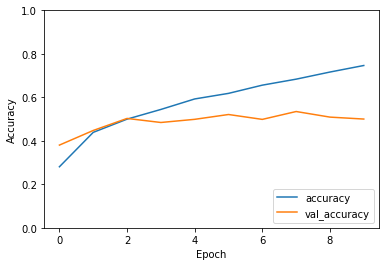

In [99]:
# change kernel size to 2x2

BATCH_SIZE = 32
# make size 32, for lenet model
SIZE = 32
IMG_SIZE = (SIZE, SIZE)

train_dataset2b = image_dataset_from_directory("C:/Users/arl3n/Documents/ActualLocalLoughborough/7COP528/CW/datasets/imageset/imageset/train",
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

validation_dataset2b = image_dataset_from_directory("C:/Users/arl3n/Documents/ActualLocalLoughborough/7COP528/CW/datasets/imageset/imageset/val",
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

# get class names
class_names_train2b = train_dataset2b.class_names
class_names_val2b = validation_dataset2b.class_names

# declare model
model2b = models.Sequential()
# add convolutional layern with 6 filters and 2x2 kernel
model2b.add(layers.Conv2D(filters=6, kernel_size=(2, 2), activation='relu', input_shape=(SIZE,SIZE,3)))
# add avg pooling layer
model2b.add(layers.AveragePooling2D())
# add convolutional layern with 16 filters and 2x2 kernel
model2b.add(layers.Conv2D(filters=16, kernel_size=(2, 2), activation='relu'))
# add avg pooling layer
model2b.add(layers.AveragePooling2D())
# add flatteining function
model2b.add(layers.Flatten())
# add fully connected layer with 120 nodes
model2b.add(layers.Dense(units=120, activation='relu'))
# add fully connected layer with 84 nodes
model2b.add(layers.Dense(units=84, activation='relu'))
# add fully connected layer with 10 nodes
model2b.add(layers.Dense(units=10, activation = 'softmax'))

# compile model
model2b.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# save/show model fitting process
history2b = model2b.fit(train_dataset2b, 
                    epochs=10, 
                    validation_data=validation_dataset2b)

# plot validation and training accuracy against epoch
plt.plot(history2b.history['accuracy'], label='accuracy')
plt.plot(history2b.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# get test loss and test accuracy
test_loss2b, test_acc2b = model2b.evaluate(validation_dataset2b, verbose=2)

This seems to have reduced overfitting somewhat, but oit still converges at around 0.5 accuracy on the training data

Let's try adding a dropout layer

Found 9469 files belonging to 10 classes.
Found 3925 files belonging to 10 classes.
Epoch 1/10
296/296 [==============================] - 49s 163ms/step - loss: 7.3819 - accuracy: 0.2620 - val_loss: 2.0348 - val_accuracy: 0.3152
Epoch 2/10
296/296 [==============================] - 49s 167ms/step - loss: 1.5442 - accuracy: 0.4983 - val_loss: 1.7955 - val_accuracy: 0.4298
Epoch 3/10
296/296 [==============================] - 49s 167ms/step - loss: 0.9349 - accuracy: 0.7027 - val_loss: 2.1610 - val_accuracy: 0.4000
Epoch 4/10
296/296 [==============================] - 49s 166ms/step - loss: 0.5016 - accuracy: 0.8471 - val_loss: 2.4131 - val_accuracy: 0.4375
Epoch 5/10
296/296 [==============================] - 49s 165ms/step - loss: 0.2678 - accuracy: 0.9225 - val_loss: 2.5998 - val_accuracy: 0.4377
Epoch 6/10
296/296 [==============================] - 48s 163ms/step - loss: 0.2108 - accuracy: 0.9429 - val_loss: 2.9383 - val_accuracy: 0.4260
Epoch 7/10
296/296 [==========================

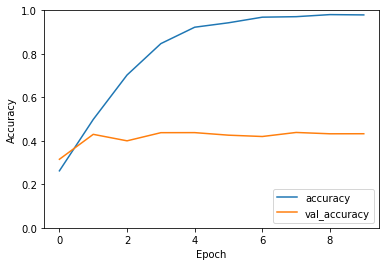

In [101]:
# add dropout layer, and incrase image size

BATCH_SIZE = 32
SIZE = 200
IMG_SIZE = (SIZE, SIZE)

train_dataset2b = image_dataset_from_directory("C:/Users/arl3n/Documents/ActualLocalLoughborough/7COP528/CW/datasets/imageset/imageset/train",
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

validation_dataset2b = image_dataset_from_directory("C:/Users/arl3n/Documents/ActualLocalLoughborough/7COP528/CW/datasets/imageset/imageset/val",
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

# get class names
class_names_train2b = train_dataset2b.class_names
class_names_val2b = validation_dataset2b.class_names

# declare model
model2b = models.Sequential()
# add convolutional layern with 6 filters and 3x3 kernel
model2b.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(SIZE,SIZE,3)))
# add avg pooling layer
model2b.add(layers.AveragePooling2D())
# add convolutional layern with 16 filters and 3x3 kernel
model2b.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
# add avg pooling layer
model2b.add(layers.AveragePooling2D())
# add flatteining function
model2b.add(layers.Flatten())
# add fully connected layer with 120 nodes
model2b.add(layers.Dense(units=120, activation='relu'))
# add dropout layer to avoid overfitting
layers.Dropout(0.5),
# add fully connected layer with 84 nodes
model2b.add(layers.Dense(units=84, activation='relu'))
# add dropout layer to avoid overfitting
layers.Dropout(0.5),
# add fully connected layer with 10 nodes
model2b.add(layers.Dense(units=10, activation = 'softmax'))

# compile model
model2b.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# save/show model fitting process
history2b = model2b.fit(train_dataset2b, 
                    epochs=10, 
                    validation_data=validation_dataset2b)

# plot validation and training accuracy against epoch
plt.plot(history2b.history['accuracy'], label='accuracy')
plt.plot(history2b.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# get test loss and test accuracy
test_loss2b, test_acc2b = model2b.evaluate(validation_dataset2b, verbose=2)

This didn't do much either

So, none of these variations on the lenet model performed much better. Let's try the Alexnet model with more epochs

Found 9469 files belonging to 10 classes.
Found 3925 files belonging to 10 classes.
Epoch 1/25
296/296 [==============================] - 269s 907ms/step - loss: 8.1325 - accuracy: 0.2048 - val_loss: 2.0581 - val_accuracy: 0.2899
Epoch 2/25
296/296 [==============================] - 269s 908ms/step - loss: 2.1051 - accuracy: 0.3085 - val_loss: 2.0974 - val_accuracy: 0.2392
Epoch 3/25
296/296 [==============================] - 268s 905ms/step - loss: 1.9938 - accuracy: 0.3538 - val_loss: 1.8639 - val_accuracy: 0.3679
Epoch 4/25
296/296 [==============================] - 267s 901ms/step - loss: 1.8659 - accuracy: 0.3979 - val_loss: 1.6907 - val_accuracy: 0.4469
Epoch 5/25
296/296 [==============================] - 268s 904ms/step - loss: 1.7810 - accuracy: 0.4309 - val_loss: 1.7660 - val_accuracy: 0.4018
Epoch 6/25
296/296 [==============================] - 267s 903ms/step - loss: 1.6819 - accuracy: 0.4676 - val_loss: 2.0123 - val_accuracy: 0.3266
Epoch 7/25
296/296 [====================

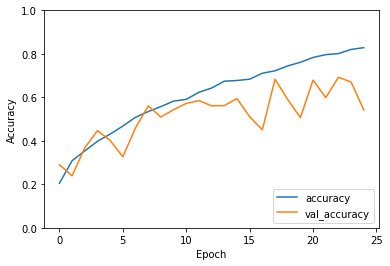

In [104]:
# how many images per batch 
BATCH_SIZE = 32
# how many pixels
SIZE = 227
IMG_SIZE = (SIZE, SIZE)

# load training set, shuffle and set image and batch size
train_dataset3 = image_dataset_from_directory("C:/Users/arl3n/Documents/ActualLocalLoughborough/7COP528/CW/datasets/imageset/imageset/train",
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

# load validation set, shuffle and set image and batch size
validation_dataset3 = image_dataset_from_directory("C:/Users/arl3n/Documents/ActualLocalLoughborough/7COP528/CW/datasets/imageset/imageset/val",
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

# get class names
class_names_train3 = train_dataset3.class_names
class_names_val3 = validation_dataset3.class_names

# declare model
model3 = models.Sequential([
    # add convolutional layern with 96 filters and 11x11 kernel, and convolution strides 4,4
    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    # normalise inputs
    layers.BatchNormalization(),
    # add max pooling layer
    layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    # add convolutional layern with 256 filters and 5x5 kernel, and convolution strides 1,1
    layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    # normalise inputs
    layers.BatchNormalization(),
    # add max pooling layer
    layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    # add convolutional layern with 384 filters and 3x3 kernel, and convolution strides 1,1
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    # normalise inputs
    layers.BatchNormalization(),
    # add convolutional layern with 384 filters and 3x3 kernel, and convolution strides 1,1
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    # normalise inputs
    layers.BatchNormalization(),
    # add convolutional layern with 256 filters and 3x3 kernel, and convolution strides 1,1
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    # normalise inputs
    layers.BatchNormalization(),
    # add max pooling layer
    layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    # flatten input
    layers.Flatten(),
    # add fully connected layer with 4096 nodes
    layers.Dense(4096, activation='relu'),
    # add dropout layer to avoid overfitting
    layers.Dropout(0.5),
    # add fully connected layer with 4096 nodes
    layers.Dense(4096, activation='relu'),
    # add dropout layer to avoid overfitting
    layers.Dropout(0.5),
    # add fully connected layer with 10 nodes
    layers.Dense(10, activation='softmax')
])

model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history3 = model3.fit(train_dataset3, 
                    epochs=25, 
                    validation_data=validation_dataset3)

# plot validation and training accuracy against epoch
plt.plot(history3.history['accuracy'], label='accuracy')
plt.plot(history3.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0., 1])
plt.legend(loc='lower right')

# get test loss and test accuracy
test_loss3, test_acc3 = model3.evaluate(validation_dataset3, verbose=2)